
**University of Malaya**

**Faculty of Computer Science & Information Technology**

**WIA1006 Machine Learning**

**Lab Assignment 1 (Crab Age Prediction Using Regression)**

Name: **Dennis Aimin Oon bin Jeffrey Oon**

Matrix number: **22001610**

Occ: **2**


# 1. Data Analysis

## 1.1 Data Loading

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Lab_Assignment1_Dataset/ModifiedCrabAgePrediction.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The dataset is loaded into the dataframe from the project directory using pandas.

The dataframe is given the name df.

## 1.2 Basic Initial Data Exploration

In [ ]:
# Display the first 5 rows of the dataset to get an initial sense of the data.
df.head(5)

Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0   F  1.4375    1.1750  0.4125  24.635715       12.332033        5.584852   
1   M  0.8875    0.6500  0.2125   5.400580        2.296310        1.374951   
2   I  1.0375    0.7750  0.2500   7.952035        3.231843        1.601747   
3   F  1.1750    0.8875  0.2500  13.480187        4.748541        2.282135   
4   I  0.8875    0.6625  0.2125   6.903103        3.458639        1.488349   

   Shell Weight  Age  
0      6.747181    9  
1      1.559222    6  
2      2.764076    6  
3      5.244657   10  
4      1.700970    6

In [ ]:
# Shows data types and non-null values for every columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3500 non-null   object 
 1   Length          3456 non-null   float64
 2   Diameter        3468 non-null   float64
 3   Height          3413 non-null   float64
 4   Weight          3462 non-null   float64
 5   Shucked Weight  3500 non-null   float64
 6   Viscera Weight  3500 non-null   float64
 7   Shell Weight    3500 non-null   float64
 8   Age             3500 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 246.2+ KB


From df.info(), we knew the total features and samples we have.
* The dataset has 3500 samples, or rows of observation with 9 columns.
* Have 9 features determining 1 target output (Age)
* 9 features is good enough
* Have 3500 samples is good
* Age data has enough samples

From df.info(), we knew the features data type.

float64
* Length
* Diameter
* Height
* Weight
* Shucked Weight
* Viscera Weight
* Shell Weight

object
* Sex

int64
* Age


In [ ]:
# Shows the total number of missing values per column.
df.isna().sum()

Sex                0
Length            44
Diameter          32
Height            87
Weight            38
Shucked Weight     0
Viscera Weight     0
Shell Weight       0
Age                0
dtype: int64

From df.isna().sum(), we know the amount of null values in each column in the dataframe.


*   Length column have 44 total null values
*   Diameter column have 32 total null values
*   Height column have 87 total null values
*   Weight column have 38 total null values
*   All other columns have no null values



In [ ]:
# Shows the missing values in Boolean.
df.isna()

Sex  Length  Diameter  Height  Weight  Shucked Weight  Viscera Weight  \
0     False   False     False   False   False           False           False   
1     False   False     False   False   False           False           False   
2     False   False     False   False   False           False           False   
3     False   False     False   False   False           False           False   
4     False   False     False   False   False           False           False   
...     ...     ...       ...     ...     ...             ...             ...   
3495  False   False     False   False   False           False           False   
3496  False   False     False   False   False           False           False   
3497  False   False     False   False   False           False           False   
3498  False   False     False   False   False           False           False   
3499  False   False     False   False   False           False           False   

      Shell Weight    Age  
0            False  False  
1            False  False  
2            False  False  
3            False  False  
4            False  False  
...            ...    ...  
3495         False  False  
3496         False  False  
3497         False  False  
3498         False  False  
3499         False  False  

[3500 rows x 9 columns]

df.isna() shows whether there are missing values or not in each column in a row.

*   False means that there are no missing values in the column in the row.

*   True means there are missing values in the column in the row.

In [ ]:
# Shows summary statistics (e.g., min, max, mean, std deviation, and quartiles).
df.describe()

Length     Diameter       Height       Weight  Shucked Weight  \
count  3456.000000  3468.000000  3413.000000  3462.000000     3500.000000   
mean      1.314131     1.022365     0.350509    23.786946       10.283194   
std       0.299806     0.248250     0.106293    13.920088        6.297363   
min       0.187500     0.137500     0.000000     0.056699        0.028349   
25%       1.125000     0.875000     0.287500    12.813974        5.372230   
50%       1.375000     1.062500     0.362500    23.119017        9.695529   
75%       1.537500     1.200000     0.412500    33.020080       14.330672   
max       2.037500     1.625000     2.825000    80.101512       42.184056   

       Viscera Weight  Shell Weight          Age  
count     3500.000000   3500.000000  3500.000000  
mean         5.168507      6.831221     9.977714  
std          3.116262      3.945384     3.216236  
min          0.014175      0.042524     1.000000  
25%          2.689659      3.752765     8.000000  
50%          4.890289      6.704657    10.000000  
75%          7.257472      9.355335    11.000000  
max         21.545620     28.491248    29.000000

df.describe() returns the description of the data in each column in the dataframe.
*   count gives the total amount of data in each columns
*   mean gives the average value of the whole column for each columns
*   std gives the standard deviation of each value in the column for each columns
*   min gives the lowest value in each columns
*   25% gives the number of values lower than 25% percentile of the column
*   50% gives the number of values lower than 50% percentile of the column
*   75% gives the number of values lower than 75% percentile of the column
*   max gives the highest value in each columns

In [ ]:
df.Sex.value_counts()

Sex
M    1293
F    1110
I    1097
Name: count, dtype: int64

In [ ]:
print(f'Maximum age :{df.Age.max()/12}')
print(f'Mean age :{df.Age.mean()/12}')
print(f'Minimum age :{df.Age.min()/12}')

Maximum age :2.4166666666666665
Mean age :0.8314761904761904
Minimum age :0.08333333333333333


# 2. Data Preprocessing

## 2.1 Data Cleaning

#### 2.1.1 Handling incomplete data/missing values

I didn't decided to drop the missing values because we have 201 missing values out of 3500 entries, this might lead to a significant loss of data and potentially bias the analysis.

Thus, I decided to fill in the missing values.

In [ ]:
# Correlation analysis
numerical =  df.drop('Sex', axis=1).columns
df_numerical = df[numerical]
df_numerical.corr()

Length  Diameter    Height    Weight  Shucked Weight  \
Length          1.000000  0.986730  0.812447  0.925954        0.898352   
Diameter        0.986730  1.000000  0.819607  0.926294        0.893722   
Height          0.812447  0.819607  1.000000  0.803619        0.762362   
Weight          0.925954  0.926294  0.803619  1.000000        0.969379   
Shucked Weight  0.898352  0.893722  0.762362  0.969379        1.000000   
Viscera Weight  0.903017  0.899213  0.782814  0.965854        0.932614   
Shell Weight    0.898002  0.906580  0.803409  0.954710        0.882487   
Age             0.553612  0.572054  0.542737  0.530524        0.414230   

                Viscera Weight  Shell Weight       Age  
Length                0.903017      0.898002  0.553612  
Diameter              0.899213      0.906580  0.572054  
Height                0.782814      0.803409  0.542737  
Weight                0.965854      0.954710  0.530524  
Shucked Weight        0.932614      0.882487  0.414230  
Viscera Weight        1.000000      0.905444  0.493875  
Shell Weight          0.905444      1.000000  0.619402  
Age                   0.493875      0.619402  1.000000

Before we determine to use which methods to fill in the missing values, we use df.corr() first

df.corr() shows the strength and direction of the correlation between two columns in the dataframe.
*   The number shows the strength of the correlation

We can use mean imputation for above situation.

In [ ]:
# Computation of the Mean value by using mean ()
mean_length = df.Length.mean ()
print ("Mean length: %.2f" % mean_length)

# Impute the missing data with its mean by using fillna ()
df.Length.fillna(mean_length, inplace=True)

Mean length: 1.31


In [ ]:
# Computation of the Mean value by using mean ()
mean_diameter = df.Diameter.mean ()
print ("Mean diameter: %.2f" % mean_diameter)

# Impute the missing data with its mean by using fillna ()
df.Diameter.fillna(mean_diameter, inplace=True)

Mean diameter: 1.02


In [ ]:
# Computation of the Mean value by using mean ()
mean_height = df.Height.mean ()
print ("Mean height: %.2f" % mean_height)

# Impute the missing data with its mean by using fillna ()
df.Height.fillna(mean_height, inplace=True)

Mean height: 0.35


In [ ]:
# Computation of the Mean value by using mean ()
mean_weight = df.Weight.mean ()
print ("Mean weight: %.2f" % mean_weight)

# Impute the missing data with its mean by using fillna ()
df.Weight.fillna(mean_weight, inplace=True)

Mean weight: 23.79


Since length,diameter, height and weight are physical characteristic of the object being measured, it's less likely to be influenced by other factors in the dataset.

Thus, I decided to fill in missing values with the mean length, mean diameter, mean height and mean weight as it's a relatively straightforward numerical feature.

In [ ]:
# Check whether there are still have missing value
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

df.isna().sum() shows missing or null values in the dataframe.

No missing values are detected as they have been filled in previous code.

#### 2.1.2 Changes to the dataframe to make it more neatly

In [ ]:
# Fill '0' at decimal places to all numerical values
df[['Length','Diameter','Height']] = df[['Length','Diameter','Height']].round(4)
df[['Weight','Shucked Weight','Viscera Weight','Shell Weight']] = df[['Weight','Shucked Weight','Viscera Weight','Shell Weight']].round(6)

Ensure all length, diameter and height values have exactly 4 decimal places.

Ensure all weight, shucked weight, viscera weight and shell weight values have exactly 6 decimal places

In [ ]:
# Get the latest sense of the data.
df.head(5)

Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0   F  1.4375    1.1750  0.4125  24.635716       12.332032        5.584852   
1   M  0.8875    0.6500  0.2125   5.400580        2.296310        1.374951   
2   I  1.0375    0.7750  0.2500   7.952035        3.231843        1.601747   
3   F  1.1750    0.8875  0.2500  13.480187        4.748541        2.282135   
4   I  0.8875    0.6625  0.2125   6.903103        3.458639        1.488349   

   Shell Weight  Age  
0      6.747181    9  
1      1.559222    6  
2      2.764076    6  
3      5.244658   10  
4      1.700970    6

See what the dataframe currently looks like.

It's more neatly and easy to look at the dataset.

#### 2.1.3 Remove outliers

###### 2.1.3.1 BoxPlot for all numerical features

I use BoxPlot to have a overall sense first of outliers in the dataset

<Axes: ylabel='Length'>

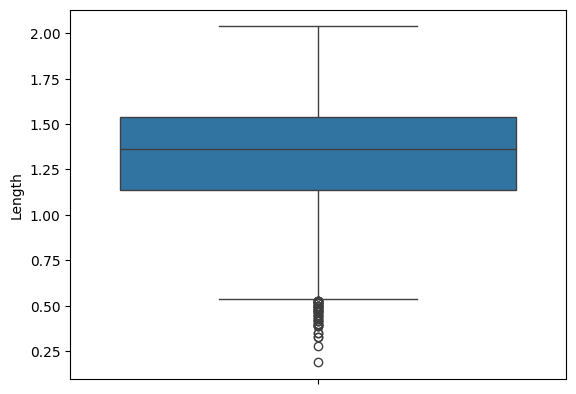

In [ ]:
# Display Length BoxPlot
import matplotlib
import seaborn as sbn
sbn.boxplot(df['Length'])

<Axes: ylabel='Diameter'>

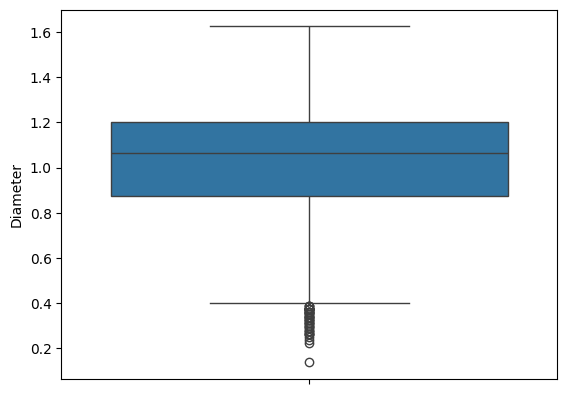

In [ ]:
# Display Diameter BoxPlot
sbn.boxplot(df['Diameter'])

<Axes: ylabel='Height'>

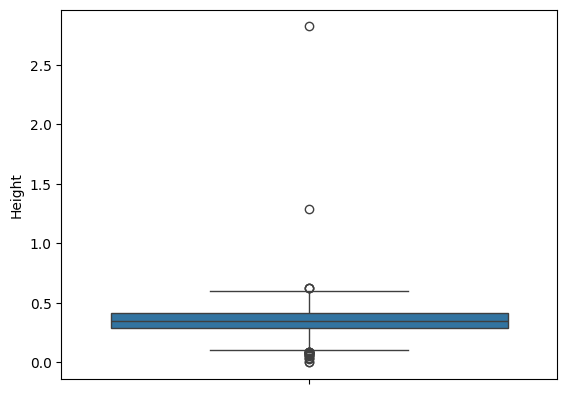

In [ ]:
# Display Height BoxPlot
sbn.boxplot(df['Height'])

<Axes: ylabel='Weight'>

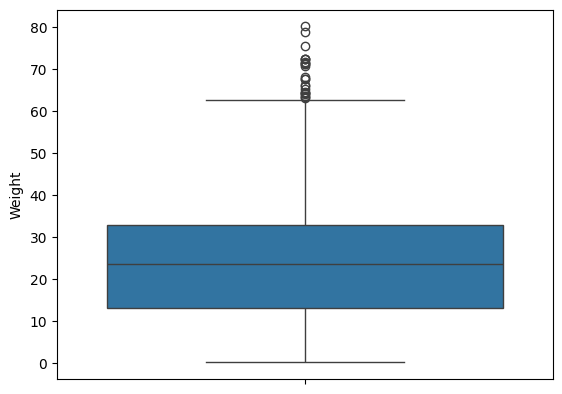

In [ ]:
# Display Weight BoxPlot
sbn.boxplot(df['Weight'])

<Axes: ylabel='Shucked Weight'>

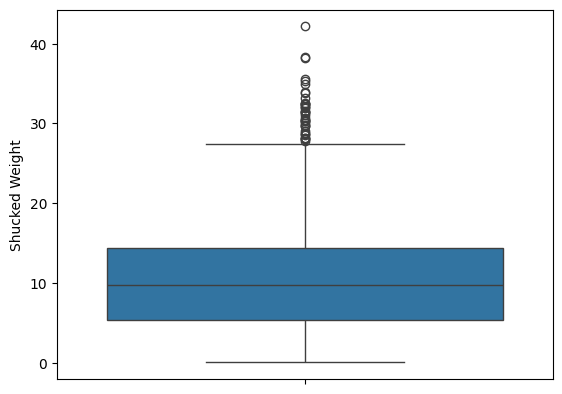

In [ ]:
# Display Shucked Weight BoxPlot
sbn.boxplot(df['Shucked Weight'])

<Axes: ylabel='Viscera Weight'>

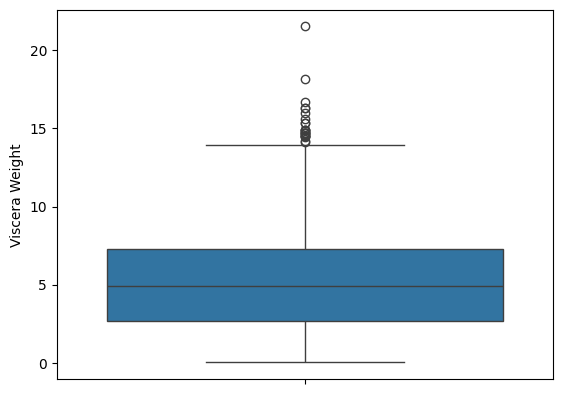

In [ ]:
# Display Viscera Weight BoxPlot
sbn.boxplot(df['Viscera Weight'])

<Axes: ylabel='Shell Weight'>

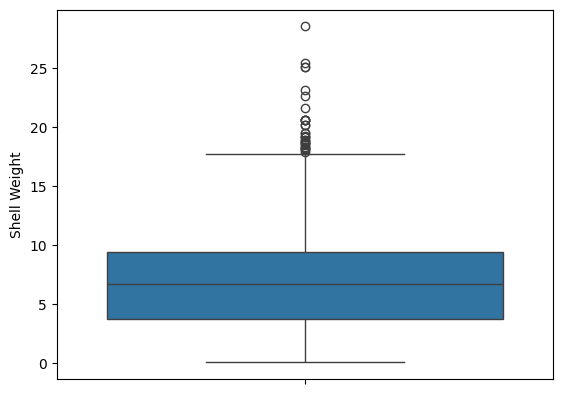

In [ ]:
# Display Shell Weight BoxPlot
sbn.boxplot(df['Shell Weight'])

###### 2.1.3.2 Removing outliers using interquartile range (IQR) method

In [ ]:
df1 = df.copy()

# Calculate the first quartile (Q1), third quartile (Q3) and interquartile range (IQR) for all numerical columns
Q1 = df1.select_dtypes(exclude=[np.object_]).quantile(0.25)
Q3 =  df1.select_dtypes(exclude=[np.object_]).quantile(0.75)
IQR = Q3-Q1
print("IQR: ")
print(IQR)
print()

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print("Lower Fence: ")
print (Lower_Fence)
print()

Upper_Fence = Q3 + (1.5 * IQR)
print("Upper Fence: ")
print (Upper_Fence)
print()

# Find any data points that fall more than 1.5 times the IQR below Q1 or above Q3 for all columns
# Find the rows containing outliers in any column
outliers = df1.select_dtypes(exclude=[np.object_])[((df1.select_dtypes(exclude=[np.object_]) < (Lower_Fence)) | (df1.select_dtypes(exclude=[np.object_]) > (Upper_Fence))).apply(lambda x: x.any(), axis=1)]

# Remove the outliers from the DataFrame
df_without_outliers = df1.select_dtypes(exclude=[np.object_])[~((df1.select_dtypes(exclude=[np.object_]) < (Lower_Fence)) | (df1.select_dtypes(exclude=[np.object_]) > (Upper_Fence))).any(axis=1)]

# Print the updated DataFrame and the outliers
print("Outliers:")
# Get the outliers with original features
outliers_with_features = df1.loc[outliers.index]
print(outliers_with_features)

print("\nDataFrame without outliers:")
# Get the indexes of outliers
outlier_indexes = outliers.index
# Drop the rows containing outliers from the original dataset
df1_without_outliers = df1.drop(index=outlier_indexes)
print(df1_without_outliers)

IQR: 
Length             0.400000
Diameter           0.325000
Height             0.125000
Weight            19.961592
Shucked Weight     8.958442
Viscera Weight     4.567813
Shell Weight       5.602570
Age                3.000000
dtype: float64

Lower Fence: 
Length             0.537500
Diameter           0.387500
Height             0.100000
Weight           -17.015016
Shucked Weight    -8.065433
Viscera Weight    -4.162062
Shell Weight      -4.651089
Age                3.500000
dtype: float64

Upper Fence: 
Length             2.137500
Diameter           1.687500
Height             0.600000
Weight            62.831351
Shucked Weight    27.768335
Viscera Weight    14.109192
Shell Weight      17.759190
Age               15.500000
dtype: float64

Outliers:
     Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
18     F  1.4875    1.1875  0.4250  35.351826       13.607760        6.378638   
37     I  1.3750    1.1000  0.4125  24.394745        8.845044        4.791

I am using a common method to find outliers which is interquartile range (IQR) method, which involves calculating the IQR and then identifying any data points that fall more than 1.5 times the IQR below the first quartile (Q1) or above the third quartile (Q3).

I am not performing scalling/normalization now because i am adding feature engineering later on. So, I will perform scalling/normalization after feature engineering.

## 2.2 Data Transformation

In [ ]:
import numpy as np

# Separating Categorical Columns from Dataframe using select_dtypes()
df_categorical = df1_without_outliers.select_dtypes(exclude=[np.number]) # exclude numerical using numpy
print(df_categorical)

     Sex
0      F
1      M
2      I
3      F
4      I
...   ..
3495   I
3496   F
3497   I
3498   I
3499   I

[3170 rows x 1 columns]


**Finding the Frequency of Distribution to Each Categorical Column**

In [ ]:
print(df_categorical['Sex'].unique())

['F' 'M' 'I']


In [ ]:
print(df_categorical.Sex.value_counts())

Sex
M    1157
I    1029
F     984
Name: count, dtype: int64


#### 2.2.1 Replacing Categorical Data with Numbers

In [ ]:
df_categorical.Sex.replace({"M": 1, "F": 2, "I": 3 }, inplace=True)

# Update the original DataFrame with the modified 'Sex' column
df1_without_outliers['Sex'] = df_categorical['Sex']

In [ ]:
print (df_categorical.head())

   Sex
0    2
1    1
2    3
3    2
4    3


In [ ]:
df1_without_outliers.head()

Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0    2  1.4375    1.1750  0.4125  24.635716       12.332032        5.584852   
1    1  0.8875    0.6500  0.2125   5.400580        2.296310        1.374951   
2    3  1.0375    0.7750  0.2500   7.952035        3.231843        1.601747   
3    2  1.1750    0.8875  0.2500  13.480187        4.748541        2.282135   
4    3  0.8875    0.6625  0.2125   6.903103        3.458639        1.488349   

   Shell Weight  Age  
0      6.747181    9  
1      1.559222    6  
2      2.764076    6  
3      5.244658   10  
4      1.700970    6

# 3. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial preliminary step in the data analysis process. It involves systematically examining and visualizing the data to gain insights, understand its structure, patterns and characteristics. Through EDA, analysts can identify potential issues, outliers or anomalies in the data, explore relationships between variables and generate hypotheses for further investigation. By conducting EDA before data cleaning and modeling, analysts can make informed decisions about how to preprocess the data effectively, ensuring that subsequent analyses and modeling efforts are based on a thorough understanding of the dataset. EDA serves as a foundation for data-driven decision-making, guiding the entire data analysis process and helping uncover actionable insights from the data.

array([[<Axes: xlabel='Sex', ylabel='Sex'>,
        <Axes: xlabel='Length', ylabel='Sex'>,
        <Axes: xlabel='Diameter', ylabel='Sex'>,
        <Axes: xlabel='Height', ylabel='Sex'>,
        <Axes: xlabel='Weight', ylabel='Sex'>,
        <Axes: xlabel='Shucked Weight', ylabel='Sex'>,
        <Axes: xlabel='Viscera Weight', ylabel='Sex'>,
        <Axes: xlabel='Shell Weight', ylabel='Sex'>,
        <Axes: xlabel='Age', ylabel='Sex'>],
       [<Axes: xlabel='Sex', ylabel='Length'>,
        <Axes: xlabel='Length', ylabel='Length'>,
        <Axes: xlabel='Diameter', ylabel='Length'>,
        <Axes: xlabel='Height', ylabel='Length'>,
        <Axes: xlabel='Weight', ylabel='Length'>,
        <Axes: xlabel='Shucked Weight', ylabel='Length'>,
        <Axes: xlabel='Viscera Weight', ylabel='Length'>,
        <Axes: xlabel='Shell Weight', ylabel='Length'>,
        <Axes: xlabel='Age', ylabel='Length'>],
       [<Axes: xlabel='Sex', ylabel='Diameter'>,
        <Axes: xlabel='Length', ylabel='

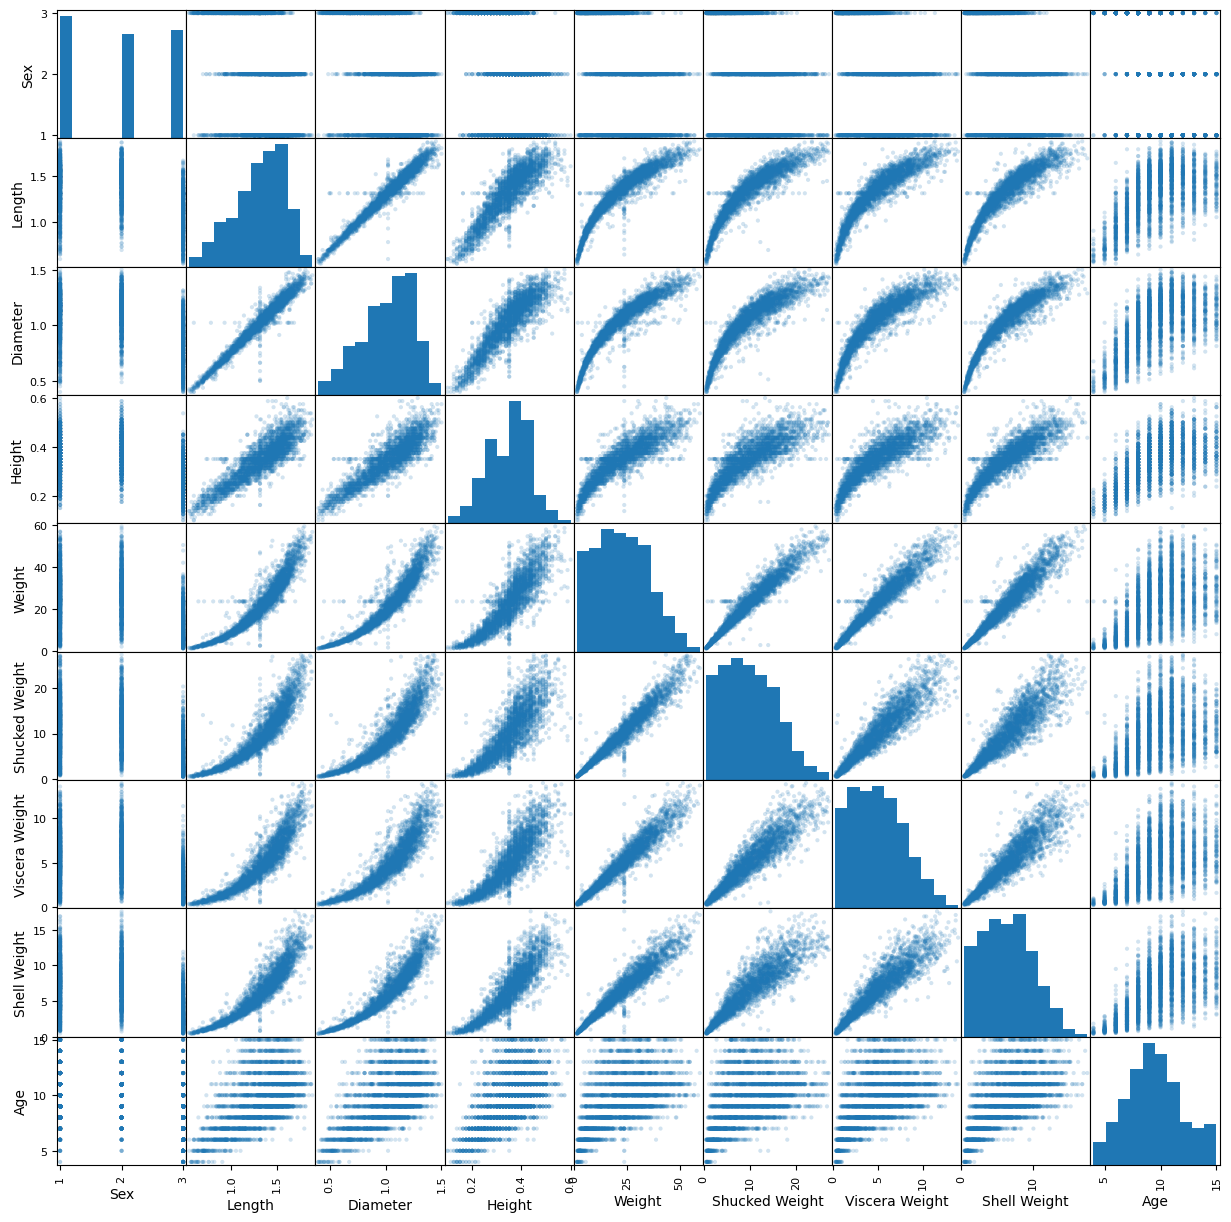

In [ ]:
# Gets all the columns with numerical values
df_numerical = df1_without_outliers._get_numeric_data()

# Create a scatter matrix for the numerical columns
pd.plotting.scatter_matrix(df_numerical,alpha=0.2,figsize=(15,15))

* The scatter matrix provides a visual overview of the relationships between pairs of numerical variables in the dataset.

* Each cell in the matrix represents a scatter plot of two variables and the diagonal cells show the distribution of individual variables.

* This visualization is useful for identifying patterns, correlations and potential outliers in the data.

<Axes: >

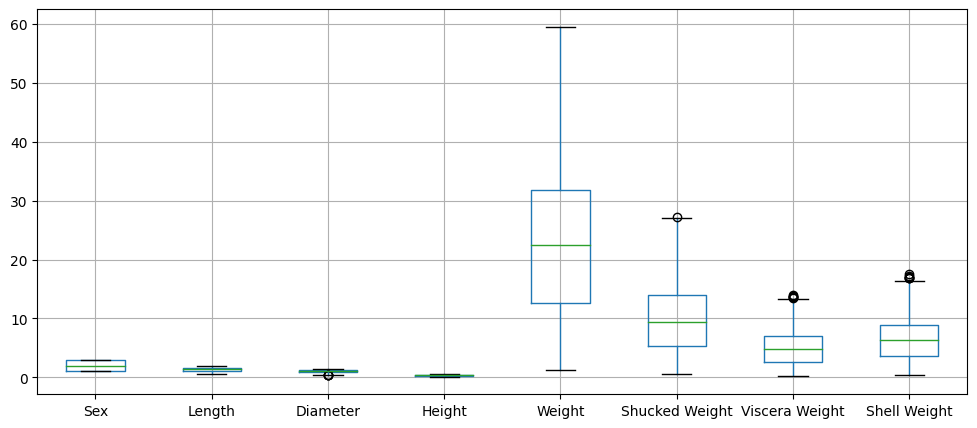

In [ ]:
# Create a boxplot for each numerical column in df_numerical
df_numerical.drop('Age',axis=1).boxplot(figsize=(12,5))

* Each box represents the interquartile range (IQR) of the data with a line inside the box indicating the median.

* The "whiskers" extend to the minimum and maximum values within a certain range and any points beyond the whiskers are considered potential outliers.

* This visualization is helpful for identifying the central tendency, spread and presence of outliers in each numerical variable of the dataset.

* It provides a quick and effective way to understand the distribution of the data across different features.

In [ ]:
import matplotlib.pyplot as plt

# Takes a list of the cleaned dataframe columns
cols = df1_without_outliers.columns

# Filter out categorical columns form the list of cols
categorical = list(set(cols) - set(df_numerical))

# Creates a dataframe only with categorical columns
df_categorical = df1_without_outliers[categorical]

for col in df_categorical.columns:
    # Counting the unique values in a column
    n_unique = df_categorical[col].nunique()

    # Execute statement below only if the column has <= 5 unique values
    if(n_unique<=5):
      # Count/categorize the number of samples in a unique value and plot it as a bar
      df_categorical[col].value_counts().plot(kind='bar',figsize=(5,10))
      plt.show()

* This code is particularly useful for visualizing the distribution of categorical variables with a small number of unique values, allowing us to understand the frequency of each category in the dataset.

In [ ]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (8, 4)
mpl.rcParams['figure.facecolor'] = '#00000000'

* I configures Seaborn to use a 'darkgrid' style for its plots.

* I sets default parameters for Matplotlib plots, such as font size, figure size and background color.

* Additionally, the %matplotlib inline magic command ensures that Matplotlib plots are displayed inline within the Jupyter Notebook.

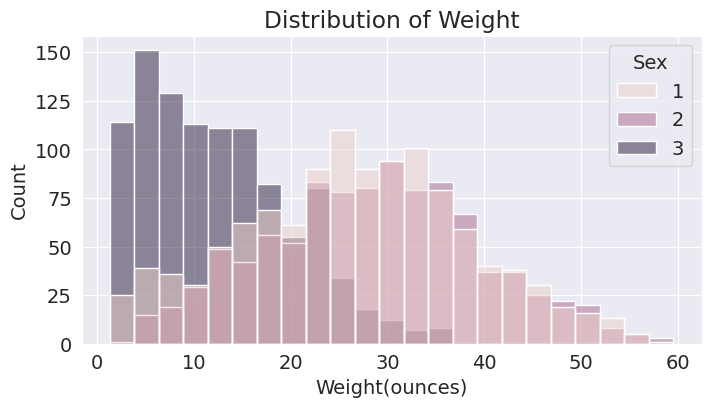

In [ ]:
sns.histplot(data = df1_without_outliers,x= 'Weight',hue='Sex')
plt.title('Distribution of Weight')
plt.xlabel('Weight(ounces)')
plt.ylabel('Count')
plt.show()

* This code creates a histogram plot using Seaborn to visualize the distribution of weights in the DataFrame df1_without_outliers.

* The histogram bars are colored based on the categories in the 'Sex' column.

* The plot is then annotated with a title, x-axis label and y-axis label before being displayed.

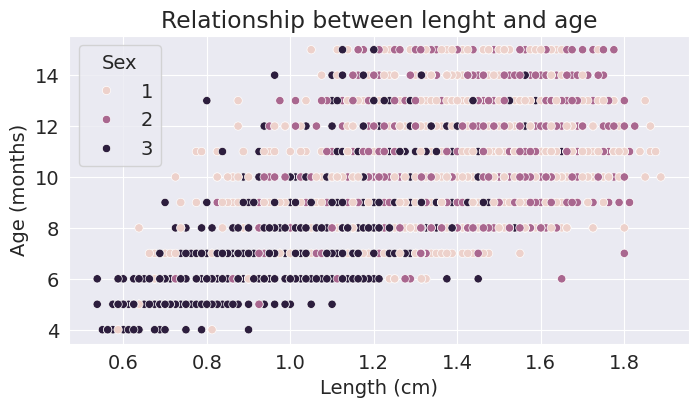

In [ ]:
sns.scatterplot(data=df1_without_outliers, x="Length", y="Age", hue="Sex")
plt.title('Relationship between lenght and age')
plt.xlabel('Length (cm)')
plt.ylabel('Age (months)')
plt.show()

It is possible that there is a positive correlation between the length of the crab and its age, but we cannot determine causality just from the scatter plot.

In [ ]:
import plotly.express as px

fig = px.scatter( df1_without_outliers,x = 'Weight',y = 'Age',color='Sex',title = 'Age over Weight')
fig.show()

* This code creates a scatter plot using Plotly Express to visualize the relationship between 'Weight' and 'Age' from the DataFrame df1_without_outliers.

* Each data point is colored based on the corresponding category in the 'Sex' column.

* The plot is then displayed using fig.show().

In [ ]:
fig = px.scatter( df1_without_outliers,x = 'Diameter',y = 'Age',color='Sex',title = 'Age over Diameter')
fig.show()

* This code creates a scatter plot using Plotly Express to visualize the relationship between 'Diameter' and 'Age' from the DataFrame df1_without_outliers.

* Each data point is colored based on the corresponding category in the 'Sex' column.

* The plot is then displayed using fig.show()

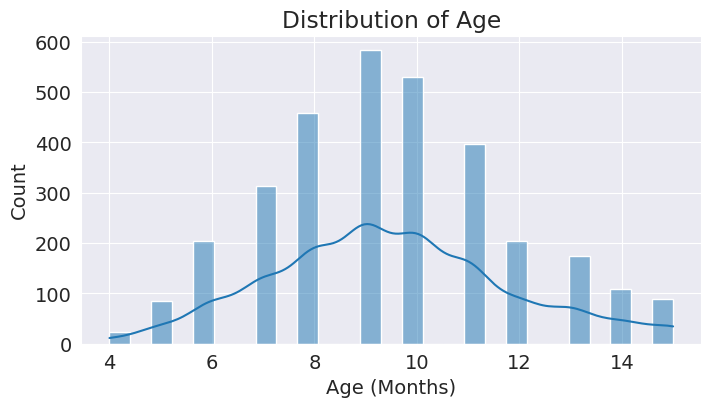

<Figure size 400x400 with 0 Axes>

In [ ]:
sns.histplot(data=df1_without_outliers, x="Age", kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age (Months)')
plt.ylabel('Count')
plt.figure(figsize=(4, 4))
plt.show()

It shows normal distribution of the Age.

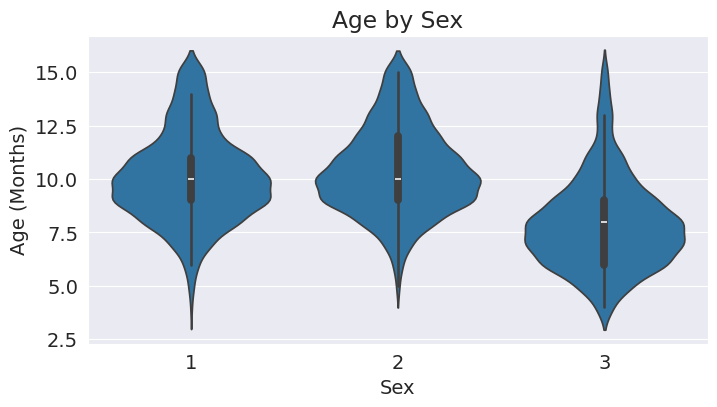

In [ ]:
sns.violinplot(data=df1_without_outliers, x="Sex", y="Age")
plt.title('Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Age (Months)')
plt.show()

* Violin plot has a bulge in the middle, it means that the median of the data is more common than other values.

* This can happen if the distribution of the data is skewed towards the median or if there are more observations around the median.

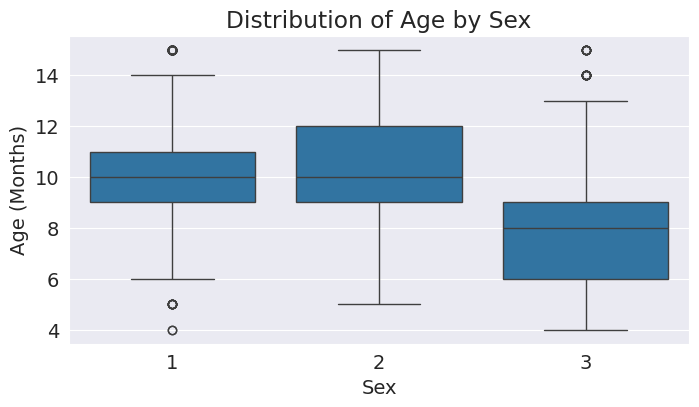

In [ ]:
sns.boxplot(data=df1_without_outliers, x="Sex", y="Age")
plt.title('Distribution of Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Age (Months)')
plt.show()

* Values such as Median, Quartiles and Outliers for Male and Female are almost same when compared to Intermediate




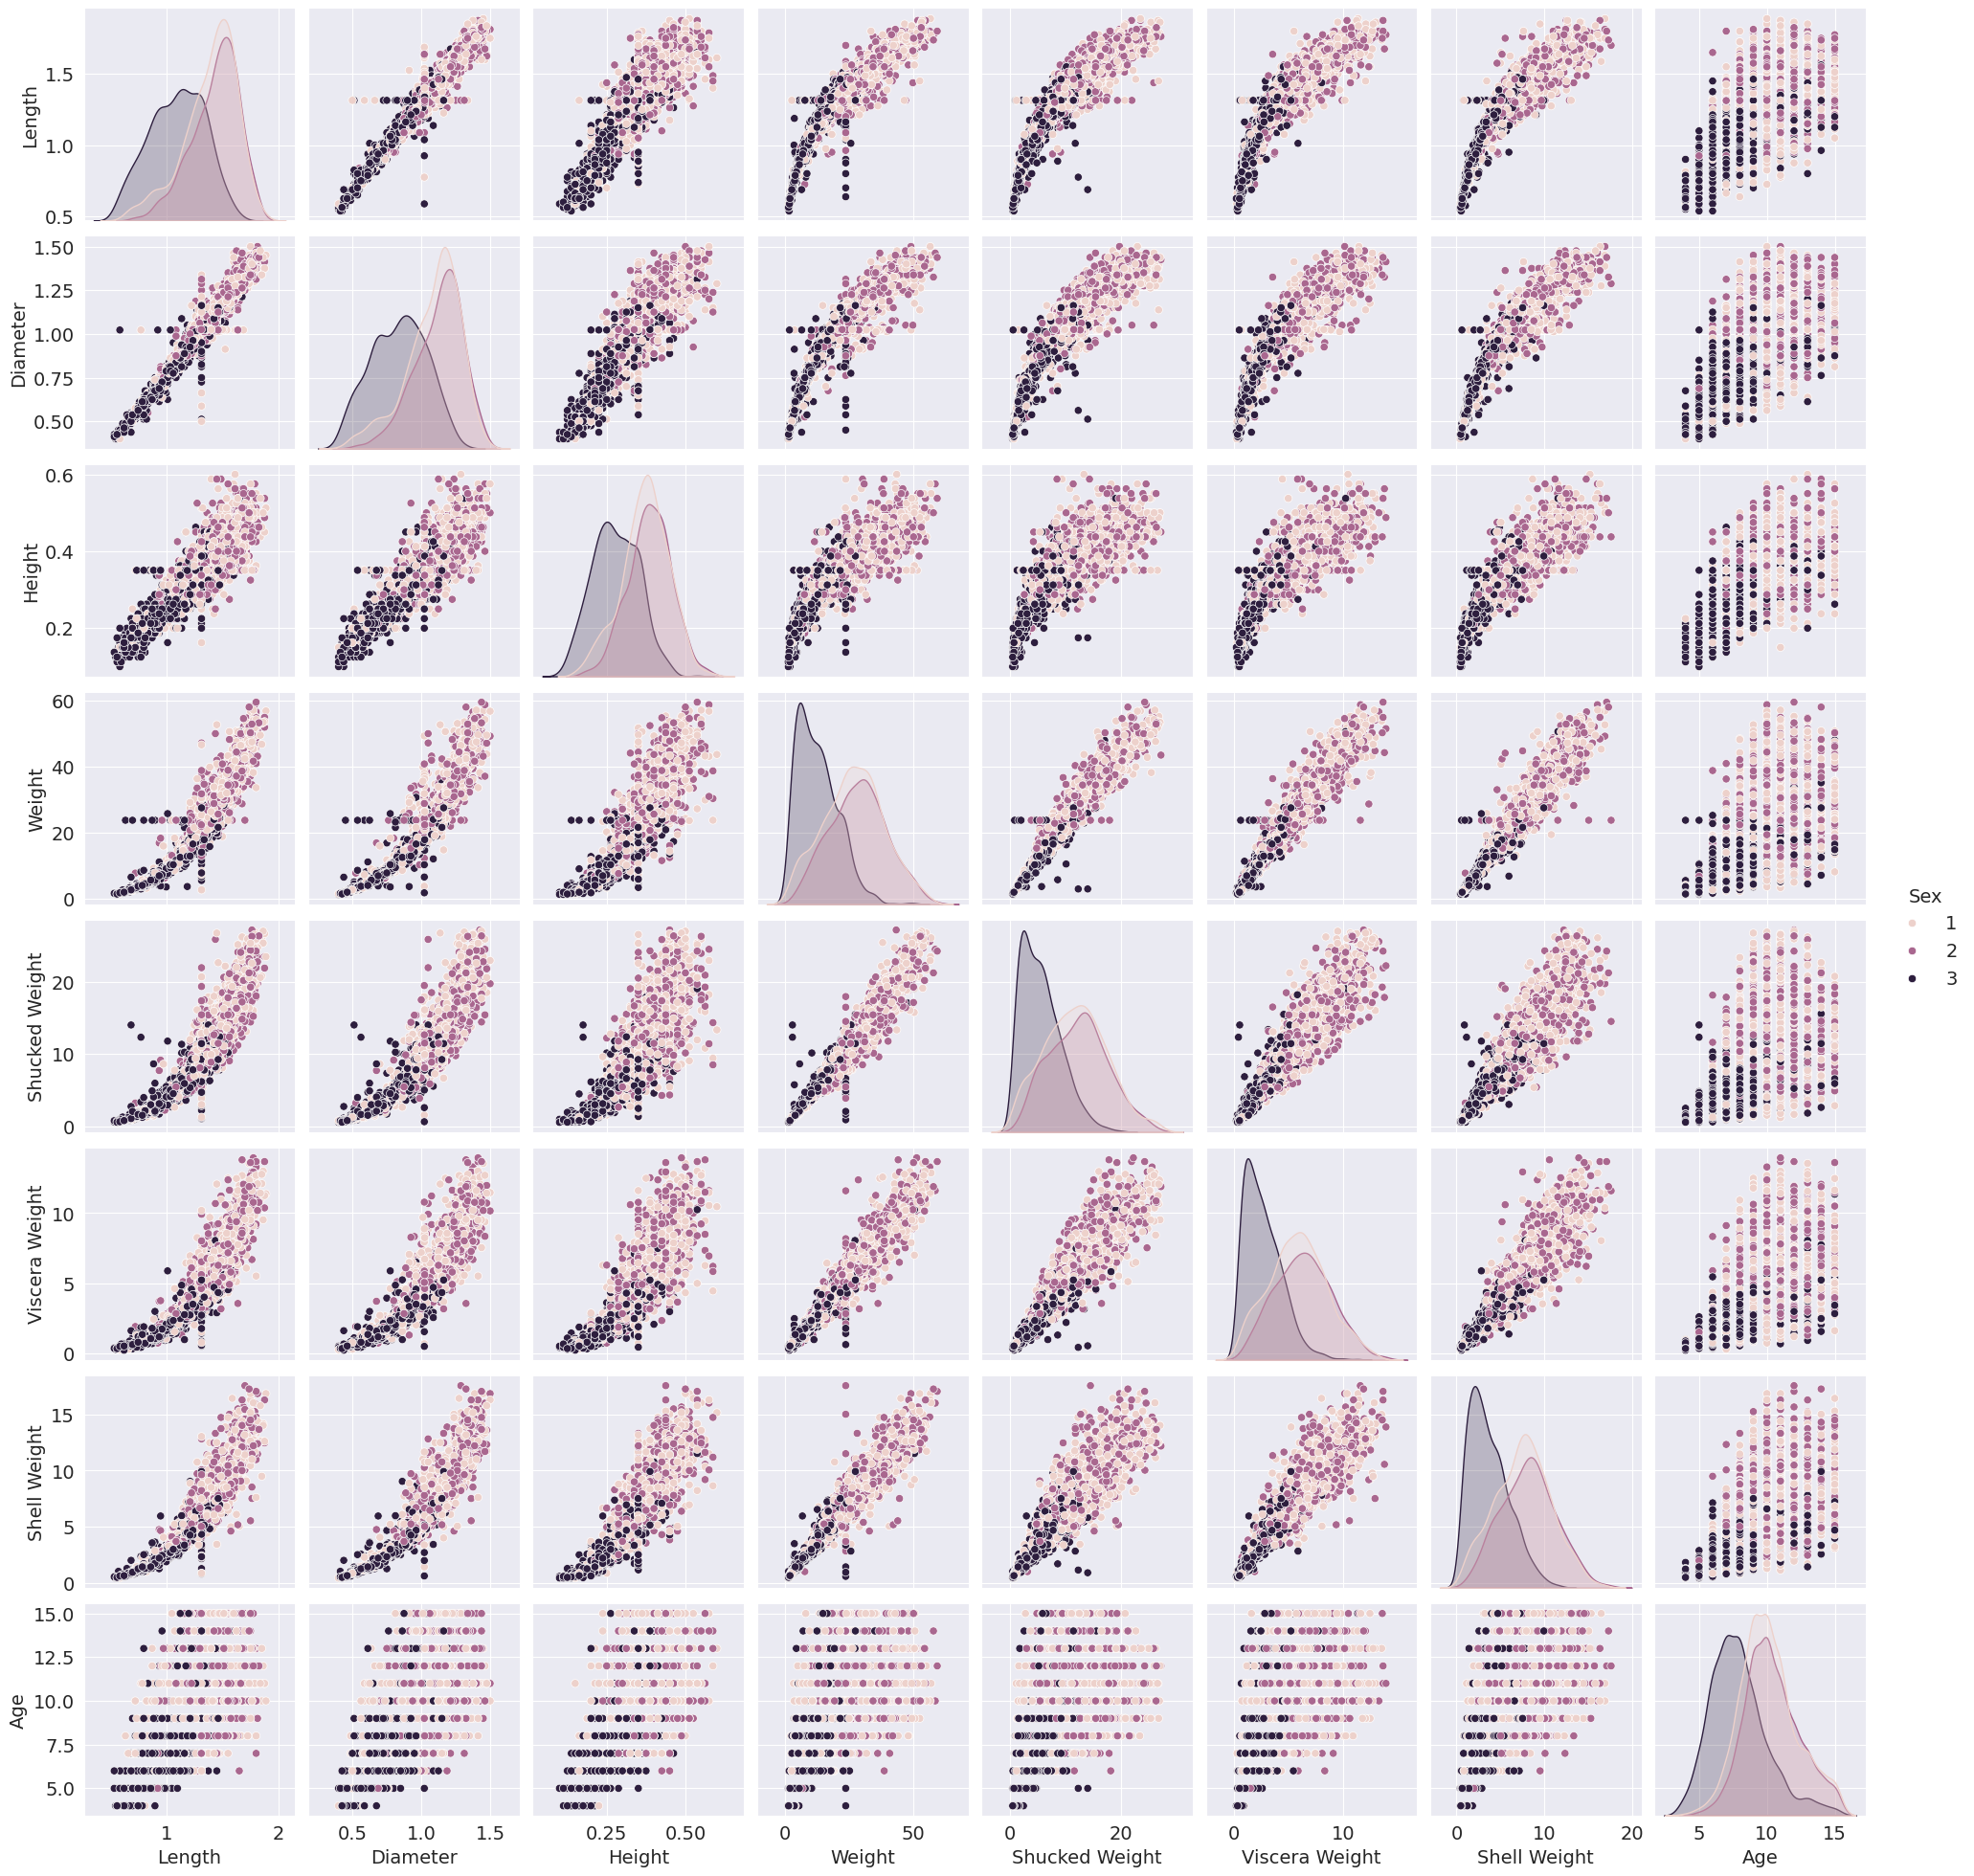

In [ ]:
sns.pairplot(data=df1_without_outliers, vars=['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age'], hue='Sex')
plt.show()

* Pairplot is showing the pairwise relationships between the variables Length, Diameter, Height, Weight and Age, with the points colored by the Sex variable.

* If we look into Age pairwise all other columns shows the better correlations with the age

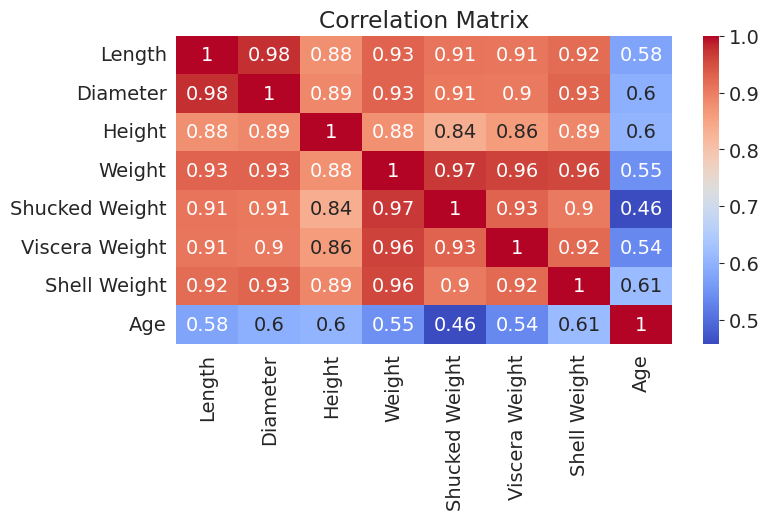

In [ ]:
numerical =  df1_without_outliers.drop('Sex', axis=1).columns
df_numerical = df1_without_outliers[numerical]
corr = df_numerical.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

* Shell weight and Diameter has the most correlation with the age

# 4. Feature Engineering

Improve the accuracy of a regression model.

#### 4.1 Body mass index (BMI)

* A Domain-specific Feature Engineering

In [ ]:
# Body Mass Index

#df_norm_min_max['BMI'] = df_norm_min_max['Weight']/(df_norm_min_max['Length'] ** 2)


df1_without_outliers['BMI'] = df1_without_outliers['Weight']/(df1_without_outliers['Length'] ** 2)

#### 4.2 Ratios

In [ ]:
# Length to diameter ratio

#df_norm_min_max['Len_dia_ratio'] = df_norm_min_max['Length'] / df_norm_min_max['Diameter']
df1_without_outliers['Len_dia_ratio'] = df1_without_outliers['Length'] / df1_without_outliers['Diameter']


# Weight-to-shucked weight ratio
#df_norm_min_max['Weight_ShuckedWeight_Ratio'] = df_norm_min_max['Weight'] / df_norm_min_max['Shucked Weight']
df1_without_outliers['Weight_ShuckedWeight_Ratio'] = df1_without_outliers['Weight'] / df1_without_outliers['Shucked Weight']

#### 4.3 Interactions

In [ ]:
# Product of len,height,weight

#df_norm_min_max['Length*height*weight'] = df_norm_min_max['Length'] * df_norm_min_max['Height'] * df_norm_min_max['Weight']
df1_without_outliers['Length*height*weight'] = df1_without_outliers['Length'] * df1_without_outliers['Height'] * df1_without_outliers['Weight']

#### 4.4 Polynomial features

* Polynomial features capture potential nonlinear relationships between features and the target variable (Age).

* We can create squared or cubed versions of all numerical features.

In [ ]:
df1_without_outliers.head(1)

Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0    2  1.4375     1.175  0.4125  24.635716       12.332032        5.584852   

   Shell Weight  Age       BMI  Len_dia_ratio  Weight_ShuckedWeight_Ratio  \
0      6.747181    9  11.92201       1.223404                    1.997701   

   Length*height*weight  
0              14.60821

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Define the features and target variable
features = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']
target = 'Age'

poly = PolynomialFeatures(degree=2, include_bias=False)  # Second-degree polynomial features
poly_features = poly.fit_transform(df1_without_outliers[features])
poly_feature_names = poly.get_feature_names_out(features)

poly_data = pd.DataFrame(poly_features, columns=poly_feature_names)

df1_without_outliers = df1_without_outliers.reset_index(drop=True)
poly_data = poly_data.reset_index(drop=True)

df1_without_outliers = pd.concat([df1_without_outliers, poly_data], axis=1)


In [ ]:
print(df1_without_outliers.columns)

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'BMI', 'Len_dia_ratio',
       'Weight_ShuckedWeight_Ratio', 'Length*height*weight', 'Length',
       'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight',
       'Shell Weight', 'Length^2', 'Length Diameter', 'Length Height',
       'Length Weight', 'Length Shucked Weight', 'Length Viscera Weight',
       'Length Shell Weight', 'Diameter^2', 'Diameter Height',
       'Diameter Weight', 'Diameter Shucked Weight', 'Diameter Viscera Weight',
       'Diameter Shell Weight', 'Height^2', 'Height Weight',
       'Height Shucked Weight', 'Height Viscera Weight', 'Height Shell Weight',
       'Weight^2', 'Weight Shucked Weight', 'Weight Viscera Weight',
       'Weight Shell Weight', 'Shucked Weight^2',
       'Shucked Weight Viscera Weight', 'Shucked Weight Shell Weight',
       'Viscera Weight^2', 'Viscera Weight Shell Weight', 'Shell Weight^2'],
      dtype=

In [ ]:
print(df1_without_outliers.shape)
print(poly_data.shape)
print(df1_without_outliers.index)
print(poly_data.index)

(3170, 48)
(3170, 35)
RangeIndex(start=0, stop=3170, step=1)
RangeIndex(start=0, stop=3170, step=1)


In [ ]:
input_cols = list(df1_without_outliers.drop(columns='Age',axis=1))
target_col = 'Age'

In [ ]:
import numpy as np

numeric_cols = df1_without_outliers.drop(columns = ['Sex','Age']).columns.tolist()
categorical_cols = df1_without_outliers.select_dtypes('object').columns.tolist()

In [ ]:
print(list(numeric_cols))

['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'BMI', 'Len_dia_ratio', 'Weight_ShuckedWeight_Ratio', 'Length*height*weight', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Length^2', 'Length Diameter', 'Length Height', 'Length Weight', 'Length Shucked Weight', 'Length Viscera Weight', 'Length Shell Weight', 'Diameter^2', 'Diameter Height', 'Diameter Weight', 'Diameter Shucked Weight', 'Diameter Viscera Weight', 'Diameter Shell Weight', 'Height^2', 'Height Weight', 'Height Shucked Weight', 'Height Viscera Weight', 'Height Shell Weight', 'Weight^2', 'Weight Shucked Weight', 'Weight Viscera Weight', 'Weight Shell Weight', 'Shucked Weight^2', 'Shucked Weight Viscera Weight', 'Shucked Weight Shell Weight', 'Viscera Weight^2', 'Viscera Weight Shell Weight', 'Shell Weight^2']


In [ ]:
# Min-Max Normalizatioon
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  # Standardize features
scaled_features = scaler.fit_transform(df1_without_outliers[numeric_cols])
df1_without_outliers[numeric_cols] = scaled_features

* After this operation, the numerical features in df1_without_outliers will have values scaled to the range [0, 1].

* This normalization suitable for machine learning algorithms that are sensitive to the scale of input features such as Regression models.

In [ ]:
df1_without_outliers.head()

Sex    Length  Diameter  Height    Weight  Shucked Weight  Viscera Weight  \
0    2  0.666667  0.704545   0.625  0.400536        0.442379        0.390496   
1    1  0.259259  0.227273   0.225  0.070124        0.066383        0.083678   
2    3  0.370370  0.340909   0.300  0.113952        0.101434        0.100207   
3    2  0.472222  0.443182   0.300  0.208912        0.158258        0.149793   
4    3  0.259259  0.238636   0.225  0.095934        0.109931        0.091942   

   Shell Weight  Age       BMI  ...  Weight^2  Weight Shucked Weight  \
0      0.368595    9  0.181655  ...  0.170832               0.203201   
1      0.066116    6  0.092715  ...  0.007743               0.007836   
2      0.136364    6  0.102040  ...  0.017360               0.016751   
3      0.280992   10  0.143762  ...  0.050804               0.042436   
4      0.074380    6  0.126209  ...  0.012961               0.015528   

   Weight Viscera Weight  Weight Shell Weight  Shucked Weight^2  \
0               0.168552             0.163137          0.205027   
1               0.008639             0.007740          0.006750   
2               0.015165             0.021093          0.013735   
3               0.037312             0.069070          0.030083   
4               0.012139             0.011011          0.015785   

   Shucked Weight Viscera Weight  Shucked Weight Shell Weight  \
0                       0.201829                     0.198071   
1                       0.008768                     0.008014   
2                       0.014700                     0.020790   
3                       0.031329                     0.058911   
4                       0.014615                     0.013510   

   Viscera Weight^2  Viscera Weight Shell Weight  Shell Weight^2  
0          0.160103                     0.161005        0.146858  
1          0.009456                     0.008697        0.007288  
2          0.012927                     0.018484        0.024159  
3          0.026513                     0.050806        0.088501  
4          0.011125                     0.010359        0.008785  

[5 rows x 48 columns]

In [ ]:
df1_without_outliers.shape

(3170, 48)

In [ ]:
df1_without_outliers.head()

Sex    Length  Diameter  Height    Weight  Shucked Weight  Viscera Weight  \
0    2  0.666667  0.704545   0.625  0.400536        0.442379        0.390496   
1    1  0.259259  0.227273   0.225  0.070124        0.066383        0.083678   
2    3  0.370370  0.340909   0.300  0.113952        0.101434        0.100207   
3    2  0.472222  0.443182   0.300  0.208912        0.158258        0.149793   
4    3  0.259259  0.238636   0.225  0.095934        0.109931        0.091942   

   Shell Weight  Age       BMI  ...  Weight^2  Weight Shucked Weight  \
0      0.368595    9  0.181655  ...  0.170832               0.203201   
1      0.066116    6  0.092715  ...  0.007743               0.007836   
2      0.136364    6  0.102040  ...  0.017360               0.016751   
3      0.280992   10  0.143762  ...  0.050804               0.042436   
4      0.074380    6  0.126209  ...  0.012961               0.015528   

   Weight Viscera Weight  Weight Shell Weight  Shucked Weight^2  \
0               0.168552             0.163137          0.205027   
1               0.008639             0.007740          0.006750   
2               0.015165             0.021093          0.013735   
3               0.037312             0.069070          0.030083   
4               0.012139             0.011011          0.015785   

   Shucked Weight Viscera Weight  Shucked Weight Shell Weight  \
0                       0.201829                     0.198071   
1                       0.008768                     0.008014   
2                       0.014700                     0.020790   
3                       0.031329                     0.058911   
4                       0.014615                     0.013510   

   Viscera Weight^2  Viscera Weight Shell Weight  Shell Weight^2  
0          0.160103                     0.161005        0.146858  
1          0.009456                     0.008697        0.007288  
2          0.012927                     0.018484        0.024159  
3          0.026513                     0.050806        0.088501  
4          0.011125                     0.010359        0.008785  

[5 rows x 48 columns]

In [ ]:
# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(df1_without_outliers)

# Reset pandas display options to default
pd.reset_option('display.max_columns')

      Sex    Length  Diameter  Height    Weight  Shucked Weight  \
0       2  0.666667  0.704545   0.625  0.400536        0.442379   
1       1  0.259259  0.227273   0.225  0.070124        0.066383   
2       3  0.370370  0.340909   0.300  0.113952        0.101434   
3       2  0.472222  0.443182   0.300  0.208912        0.158258   
4       3  0.259259  0.238636   0.225  0.095934        0.109931   
...   ...       ...       ...     ...       ...             ...   
3165    3  0.296296  0.261364   0.275  0.097395        0.097185   
3166    2  0.750000  0.738636   0.675  0.569272        0.559214   
3167    3  0.064815  0.056818   0.125  0.011931        0.009028   
3168    3  0.388889  0.340909   0.325  0.155101        0.149230   
3169    3  0.185185  0.193182   0.225  0.047236        0.036644   

      Viscera Weight  Shell Weight  Age       BMI  Len_dia_ratio  \
0           0.390496      0.368595    9  0.181655       0.315926   
1           0.083678      0.066116    6  0.092715       0.3

In [ ]:
features = df1_without_outliers.drop(columns = ['Sex','Age'],axis =1)
target = 'Age'

# 5. Model Traning 1 - Linear Regression (using all features)

#### 5.1 Prepare the traning and test dataset (Splitting the dataset)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

# Define the features and target variable
features = df1_without_outliers.drop(columns = ['Age'],axis =1)
target = 'Age'

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(features, df1_without_outliers[target], test_size=0.3, random_state=42)


* This will split the data into training and testing sets, with 80% of the data used for training and 20% used for testing.

* The random_state parameter sets the seed for the random number generator, ensuring that the same split is obtained every time the code is run.

#### 5.2 Train the model on train data

In [ ]:
df1_without_outliers.isna().sum()

Sex                              0
Length                           0
Diameter                         0
Height                           0
Weight                           0
Shucked Weight                   0
Viscera Weight                   0
Shell Weight                     0
Age                              0
BMI                              0
Len_dia_ratio                    0
Weight_ShuckedWeight_Ratio       0
Length*height*weight             0
Length                           0
Diameter                         0
Height                           0
Weight                           0
Shucked Weight                   0
Viscera Weight                   0
Shell Weight                     0
Length^2                         0
Length Diameter                  0
Length Height                    0
Length Weight                    0
Length Shucked Weight            0
Length Viscera Weight            0
Length Shell Weight              0
Diameter^2                       0
Diameter Height     

In [ ]:
df1_without_outliers.head()

Sex    Length  Diameter  Height    Weight  Shucked Weight  Viscera Weight  \
0    2  0.666667  0.704545   0.625  0.400536        0.442379        0.390496   
1    1  0.259259  0.227273   0.225  0.070124        0.066383        0.083678   
2    3  0.370370  0.340909   0.300  0.113952        0.101434        0.100207   
3    2  0.472222  0.443182   0.300  0.208912        0.158258        0.149793   
4    3  0.259259  0.238636   0.225  0.095934        0.109931        0.091942   

   Shell Weight  Age       BMI  ...  Weight^2  Weight Shucked Weight  \
0      0.368595    9  0.181655  ...  0.170832               0.203201   
1      0.066116    6  0.092715  ...  0.007743               0.007836   
2      0.136364    6  0.102040  ...  0.017360               0.016751   
3      0.280992   10  0.143762  ...  0.050804               0.042436   
4      0.074380    6  0.126209  ...  0.012961               0.015528   

   Weight Viscera Weight  Weight Shell Weight  Shucked Weight^2  \
0               0.168552             0.163137          0.205027   
1               0.008639             0.007740          0.006750   
2               0.015165             0.021093          0.013735   
3               0.037312             0.069070          0.030083   
4               0.012139             0.011011          0.015785   

   Shucked Weight Viscera Weight  Shucked Weight Shell Weight  \
0                       0.201829                     0.198071   
1                       0.008768                     0.008014   
2                       0.014700                     0.020790   
3                       0.031329                     0.058911   
4                       0.014615                     0.013510   

   Viscera Weight^2  Viscera Weight Shell Weight  Shell Weight^2  
0          0.160103                     0.161005        0.146858  
1          0.009456                     0.008697        0.007288  
2          0.012927                     0.018484        0.024159  
3          0.026513                     0.050806        0.088501  
4          0.011125                     0.010359        0.008785  

[5 rows x 48 columns]

In [ ]:
# Create the linear regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = lr_model.predict(X_test)

# 6. Model Evaluation 1

In [ ]:
# Evaluate the model's performance
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test,Y_pred)
print(f'R-squared:{r2}')
print(f"Root Mean Squared Error: {rmse}")
print(f'Mean squared error: {mse}')

R-squared:0.5365631300418388
Root Mean Squared Error: 1.6379600779305246
Mean squared error: 2.6829132168941703


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Create pipelines for each regression model
pipelines = {
    'LinearRegression': Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('regressor', LinearRegression())]),
    'Lasso': Pipeline([('scaler', StandardScaler()), ('pca', PCA()), ('regressor', Lasso())])
}

# Define the hyperparameters for each model
parameters = {
    'LinearRegression': {},
    'Lasso': {'regressor__alpha': [0.01, 0.1, 1, 10]}
}

# Perform GridSearchCV on each pipeline
best_estimators = {}

for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, parameters[model_name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"{model_name}: Best parameters: {grid_search.best_params_}, Best score: {grid_search.best_score_}")

# Print the best model and its parameters
best_model_name = max(best_estimators, key=lambda x: best_estimators[x].score(X_test, Y_test))
best_model = best_estimators[best_model_name]

print(f"\nBest model: {best_model_name}, Test score: {best_model.score(X_test, Y_test)}")
print(f"Best parameters: {best_model.get_params()}")

LinearRegression: Best parameters: {}, Best score: 0.5040192513709589
Lasso: Best parameters: {'regressor__alpha': 0.01}, Best score: 0.5028662913278914

Best model: LinearRegression, Test score: 0.5365631300418408
Best parameters: {'memory': None, 'steps': [('scaler', StandardScaler()), ('pca', PCA()), ('regressor', LinearRegression())], 'verbose': False, 'scaler': StandardScaler(), 'pca': PCA(), 'regressor': LinearRegression(), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': None, 'pca__n_oversamples': 10, 'pca__power_iteration_normalizer': 'auto', 'pca__random_state': None, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'regressor__copy_X': True, 'regressor__fit_intercept': True, 'regressor__n_jobs': None, 'regressor__positive': False}


In [ ]:
# Create a list of dictionaries for each model's results
results_list = [
    {'model': 'LinearRegression', 'best_params': {'max_depth':10, 'n_estimators':500}, 'best_score':0.5040192513709589},
    {'model': 'Lasso', 'best_params': {'regressor__alpha': 0.01}, 'best_score': 0.5028662913278914}
]

# Convert the list of dictionaries to a dataframe
results_df = pd.DataFrame(results_list)

# Print the dataframe
results_df.sort_values(by = 'best_score',ascending=False)

model                             best_params  best_score
0  LinearRegression  {'max_depth': 10, 'n_estimators': 500}    0.504019
1             Lasso              {'regressor__alpha': 0.01}    0.502866

# 7. Model Traning 2 - Linear Regression (only using 1 feature)

#### 5.1 Prepare the traning and test dataset (Splitting the dataset)

The length of the traning dataset is: 2219
The length of the testing dataset is: 951


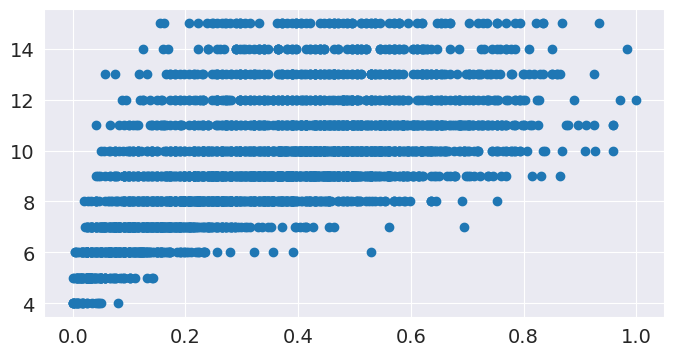

In [ ]:
from sklearn.model_selection import train_test_split

# Drop duplicate columns based on column names
df_mod_tra2 = df1_without_outliers.loc[:, ~df1_without_outliers.columns.duplicated()]

# Can select any feature here to test the R^2 value. Just replace 'Shell Weight' with the name of column in the dataset of the choice.
# I am choosing Shell Weight here because Shell Weight has the highest relation with target output (Age).
x = df_mod_tra2[['Shell Weight']]
y = df_mod_tra2[['Age']] # Target output/dependent variable

plt.scatter(x,y)

#Split the dataset into traning and testing.
#This function randomly samples the data and split into traning and testing data
#Test_size=0.3 means that the ratio of training vs testing is 70:30(70% of the dataset is set as traning data,30% i set as the testing dataset)
#Normally the ratio is set as 80:20, 70:30
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=23)

print(f'The length of the traning dataset is: {len(x_train)}')
print(f'The length of the testing dataset is: {len(x_test)}')

#### 5.2 Train the model on train data

In [ ]:
# Scikit learn module
from sklearn.linear_model import LinearRegression

#As now can see, there is not much of hyper parameters of the algorithm that can optimize here

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

print(f'Parameters m/theta_1: {lin_reg.coef_}')
print(f'Parameters c/theta_0: {lin_reg.intercept_}')

Parameters m/theta_1: [[6.89036944]]
Parameters c/theta_0: [7.04741625]


# 8. Model Evaluation 2

#### 6.1 Evaluate the model on test data

In [ ]:
print(f'R2 score {lin_reg.score(x_test,y_test)}') # If R2 score close to 1, then Better accuracy

R2 score 0.39091934213345336


#### 6.2 Visualize the regression line

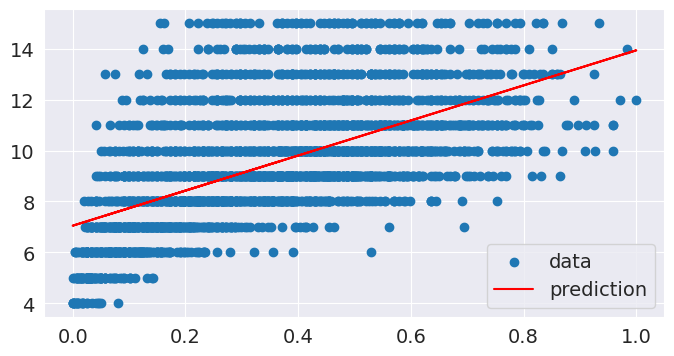

In [ ]:
y_pred = lin_reg.predict(x)
plt.scatter(x,y)
plt.plot(x,y_pred,color='red')
plt.legend(['data','prediction'])
plt.show()

#### 6.3 Visualize the regression line on the train and test data

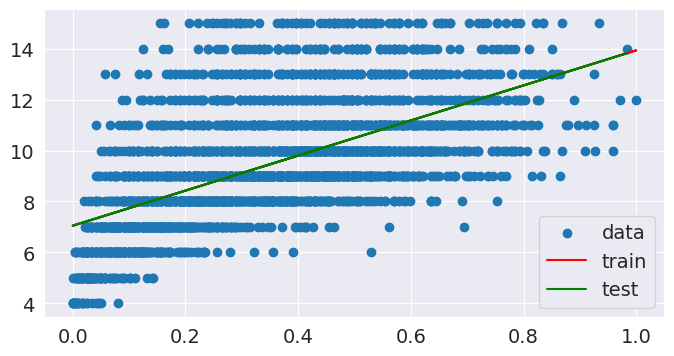

In [ ]:
y_pred_train = lin_reg.predict(x_train)
y_pred_test = lin_reg.predict(x_test)

plt.scatter(x,y)
plt.plot(x_train,y_pred_train,color='red')
plt.plot(x_test,y_pred_test,color='green')
plt.legend(['data','train','test'])
plt.show()

# 9. Conclusion

The best R-squared, best Root Mean Squared Error and best Mean squared error is from Model Traning 1 - Linear Regression with using all features.

R-squared:0.5365631300418388

Root Mean Squared Error: 1.6379600779305246

Mean squared error: 2.6829132168941703

Overall, the model has a moderate R-squared value, a lower RMSE and MSE. This suggests that the model may be useful for predicting the age of crab with a certain level of accuracy, but there is still room for improvement.